## Observations and Insights 

In [116]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import scipy.stats as st
%matplotlib notebook

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")
# Display the data table for preview
combined_df.head() 

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [117]:
# Checking the number of mice.
combined_df["Mouse ID"].nunique()

249

In [118]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_row = combined_df[combined_df.duplicated(["Mouse ID", "Timepoint"])]
duplicate_row


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [189]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_row2 = combined_df.loc[combined_df["Mouse ID"]!= "g989"]
duplicate_row2


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [120]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_df.drop_duplicates("Mouse ID")
clean_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [121]:
# Checking the number of mice in the clean DataFrame.
number_mice_clean = clean_df["Mouse ID"].count()
number_mice_clean

249

## Summary Statistics

In [122]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

mean = combined_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median = combined_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
variance = combined_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
standard_deviation = combined_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sem = combined_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

summary_df = pd.DataFrame({"Mean": mean, "Median": median, "Variance": variance, "Standard Deviation": standard_dv, "SEM": sem})
summary_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [123]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_df
# Using the aggregation method, produce the same summary statistics in a single line
summary_df = clean_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]})
summary_df

Tumor Volume (mm3)                      
                           mean median  var  std  sem
Drug Regimen                                         
Capomulin                  45.0   45.0  0.0  0.0  0.0
Ceftamin                   45.0   45.0  0.0  0.0  0.0
Infubinol                  45.0   45.0  0.0  0.0  0.0
Ketapril                   45.0   45.0  0.0  0.0  0.0
Naftisol                   45.0   45.0  0.0  0.0  0.0
Placebo                    45.0   45.0  0.0  0.0  0.0
Propriva                   45.0   45.0  0.0  0.0  0.0
Ramicane                   45.0   45.0  0.0  0.0  0.0
Stelasyn                   45.0   45.0  0.0  0.0  0.0
Zoniferol                  45.0   45.0  0.0  0.0  0.0

## Bar and Pie Charts

Text(0, 0.5, 'Mice Count')

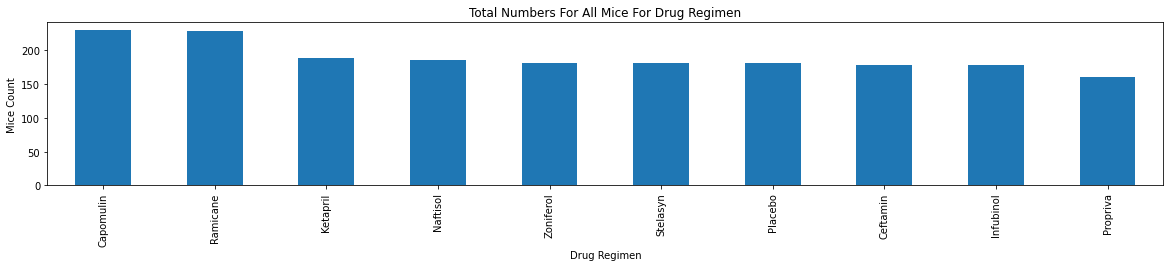

In [124]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
drug_regimen_value = combined_df["Drug Regimen"].value_counts()

drug_regimen_value.plot(kind="bar", figsize=(20,3))
plt.title("Total Numbers For All Mice For Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Mice Count")

In [125]:
%matplotlib inline

In [126]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pypplt
drug_titles = drug_regimen_value.index.values
total_numbers = drug_regimen_value.values

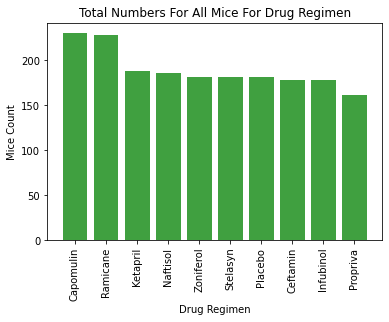

In [129]:
x_axis = np.arange(0,len(drug_titles))
tick_locations = []
for x in x_axis:
    tick_locations.append(x)
plt.title("Total Numbers For All Mice For Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Mice Count")

plt.bar(x_axis, total_numbers, facecolor="green", alpha=0.75, align="center")
plt.xticks(tick_locations, drug_titles, rotation = "vertical")
plt.show()

In [132]:
gender_count = combined_df["Sex"].value_counts()

Male      958
Female    935
Name: Sex, dtype: int64

([<matplotlib.patches.Wedge at 0x1ec43238070>,
 [Text(-0.6908564105755949, -0.8559891471079557, ''),
  Text(0.690856410575595, 0.8559891471079556, '')],
 [Text(-0.37683076940486987, -0.46690317114979396, '50.6%'),
  Text(0.3768307694048699, 0.46690317114979385, '49.4%')])

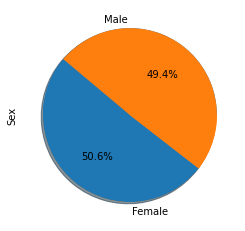

In [185]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_count.plot.pie()
plt.pie(gender_count,autopct="%1.1f%%", shadow=True, startangle=140)


(-1.109752519617764,
 1.1251534837968824,
 -1.1101268549061045,
 1.1220885671018512)

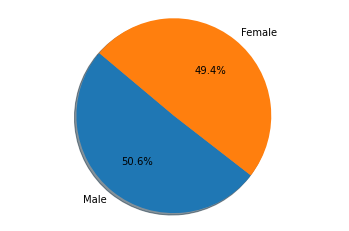

In [140]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
my_labels= ["Male", "Female"]
my_sizes= gender_count
plt.pie(my_sizes,labels=my_labels,autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")


## Quartiles, Outliers and Boxplots

In [158]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
#max_timepoint = combined_df.groupby("Mouse ID").agg({"Timepoint": ["max"]})
max_timepoint = combined_df.groupby("Mouse ID")["Timepoint"].max()
max_timepoint = max_timepoint.reset_index()
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
combined_df2 = pd.merge(max_timepoint, combined_df, on=["Mouse ID","Timepoint"])
combined_df2



,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,10,Propriva,Female,12,26,48.710661,0
245,z578,45,Ramicane,Male,11,16,30.638696,0
246,z581,45,Infubinol,Female,24,25,62.754451,3
247,z795,45,Naftisol,Female,13,29,65.741070,3


In [174]:
# Put treatments into a list for for loop (and later for plot labels)
drugs = ["Capomulin", "Ramicane", "Infubinol","Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in drugs:
    
    Regiments = combined_df2[combined_df2["Drug Regimen"]== drug]["Tumor Volume (mm3)"]
    #duplicate_row2 = combined_df[combined_df.duplicated(["Mouse ID",]!= "g989"])]
    # Locate the rows which contain mice on each drug and get the tumor volumes
    

    # add subset 
    tumor_vol.append(Regiments)
    
    # Determine outliers using upper and lower bounds
    quartiles = Regiments.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    print(f"{drug}:The lower quartile of tumor volume is: {lowerq}")
    print(f"{drug}:The upper quartile of tumor volume is: {upperq}")
    print(f"{drug}:The interquartile range of tumor volume is: {iqr}")
    print(f"{drug}:The the median of tumor volume is: {quartiles[0.5]} ")

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"{drug} Values below {lower_bound} could be outliers.")
    print(f"{drug} Values above {upper_bound} could be outliers.")
    outliers = Regiments.loc[(Regiments<lower_bound)|(Regiments>upper_bound)] 
    print(f" outliers are {outliers}")

Capomulin:The lower quartile of tumor volume is: 32.37735684
Capomulin:The upper quartile of tumor volume is: 40.1592203
Capomulin:The interquartile range of tumor volume is: 7.781863460000004
Capomulin:The the median of tumor volume is: 38.1251644 
Capomulin Values below 20.70456164999999 could be outliers.
Capomulin Values above 51.83201549 could be outliers.
 outliers are Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane:The lower quartile of tumor volume is: 31.56046955
Ramicane:The upper quartile of tumor volume is: 40.65900627
Ramicane:The interquartile range of tumor volume is: 9.098536719999998
Ramicane:The the median of tumor volume is: 36.56165229 
Ramicane Values below 17.912664470000003 could be outliers.
Ramicane Values above 54.30681135 could be outliers.
 outliers are Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol:The lower quartile of tumor volume is: 54.04860769
Infubinol:The upper quartile of tumor volume is: 65.52574285
Infubinol:The inter

<function matplotlib.pyplot.show(close=None, block=None)>

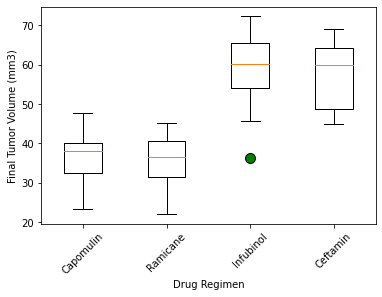

In [177]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
box_plot = dict(markerfacecolor = "green", markersize = 10)

plt.boxplot(tumor_vol, labels = drugs, flierprops = box_plot)
plt.xlabel("Drug Regimen")
plt.ylabel("Final Tumor Volume (mm3)")
plt.xticks(rotation = 45,) 
#ha = "right")
plt.show 

## Line and Scatter Plots

Text(0.5, 1.0, 'Tumor Volume of Mouse')

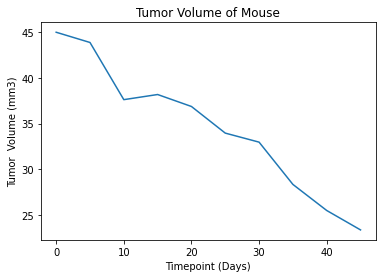

In [181]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_plot = combined_df.loc[combined_df["Drug Regimen"]=="Capomulin"]
capomulin_plot.head()

mouse_id = capomulin_plot.loc[capomulin_plot["Mouse ID"] == "s185"]
plt.plot(mouse_info["Timepoint"], mouse_id["Tumor Volume (mm3)"])
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor  Volume (mm3)")
plt.title ("Tumor Volume of Mouse")

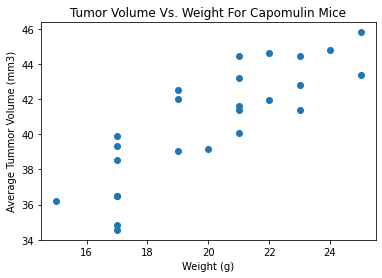

In [182]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_average = capomulin_plot.groupby("Mouse ID").mean()
capomulin_average.head()

plt.scatter(capomulin_average["Weight (g)"], capomulin_average["Tumor Volume (mm3)"])
plt.xlabel("Weight (g)")
plt.ylabel("Average Tummor Volume (mm3)")
plt.title("Tumor Volume Vs. Weight For Capomulin Mice")
plt.show()

## Correlation and Regression

The correlation between mouse weight and average tumor volume is 0.84.
LinregressResult(slope=0.9544396890241045, intercept=21.552160532685015, rvalue=0.8419363424694718, pvalue=1.3225722434712642e-07, stderr=0.1275435903320134, intercept_stderr=2.590987686768349)


Text(0.5, 1.0, 'Tumor Volume Vs. Weight in Mice for Capomulin')

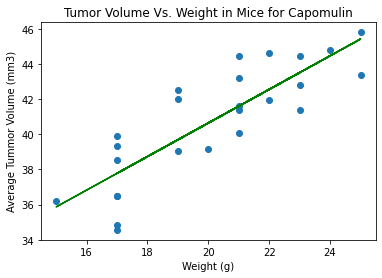

In [183]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = round(st.pearsonr(capomulin_average["Weight (g)"], capomulin_average["Tumor Volume (mm3)"])[0],2)
print(f"The correlation between mouse weight and average tumor volume is {correlation}.")

model = st.linregress(capomulin_average["Weight (g)"], capomulin_average["Tumor Volume (mm3)"])
print(model)

y_values = capomulin_average["Weight (g)"] * model[0] + model[1]

plt.scatter(capomulin_average["Weight (g)"], capomulin_average["Tumor Volume (mm3)"])
plt.plot(capomulin_average["Weight (g)"], y_values, color = "green")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tummor Volume (mm3)")
plt.title("Tumor Volume Vs. Weight in Mice for Capomulin")